In [1]:
# Authors: A. Wenteler, M. Huebner, M. Occhetta

In [11]:
import pandas as pd 
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_sizes
import seaborn as sns
#import pypalettes

formatter = mpl_sizes.get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis
mpl.rcParams['text.usetex'] = False


In [4]:
# load cross_split_overlap_values.pkl
with open('cross_split_overlap_values.pkl', 'rb') as f:
    cross_split_overlap_values = pkl.load(f)

cso_dict = {
    'scbert': cross_split_overlap_values[0],
    'scgpt': cross_split_overlap_values[1]
}

In [5]:
scbert = pd.read_csv('individual_results/pert_level_scbert_non_adj_full.csv')
scgpt = pd.read_csv('individual_results/pert_level_scgpt_non_adj_full.csv')

In [6]:
def preprocess_data(grouped_data):
    """Pre-process the data for plotting."""
    
    data_splits = grouped_data['data.split'].unique()

    data = {}

    for i, data_split in enumerate(data_splits):
        split_data = grouped_data[grouped_data['data.split'] == data_split]['test/mse'].values
        split_data = split_data[~np.isnan(split_data)]
        
        # Ensure data is list
        if not isinstance(split_data, list):
            split_data = [split_data]

        data[data_split] = split_data

    return data

In [7]:
scbert_data = preprocess_data(scbert)
scgpt_data = preprocess_data(scgpt)

# save to json
with open('scbert_data.pkl', 'wb') as f:
    pkl.dump(scbert_data, f)

with open('scgpt_data.pkl', 'wb') as f:
    pkl.dump(scgpt_data, f)

In [8]:
scbert_split_data = {key: scbert_data[key][0] for key in scbert_data.keys()}
scgpt_split_data = {key: scgpt_data[key][0] for key in scgpt_data.keys()}

sorted_split_data_scbert = dict(sorted(scbert_split_data.items()))
sorted_split_data_scgpt = dict(sorted(scgpt_split_data.items()))


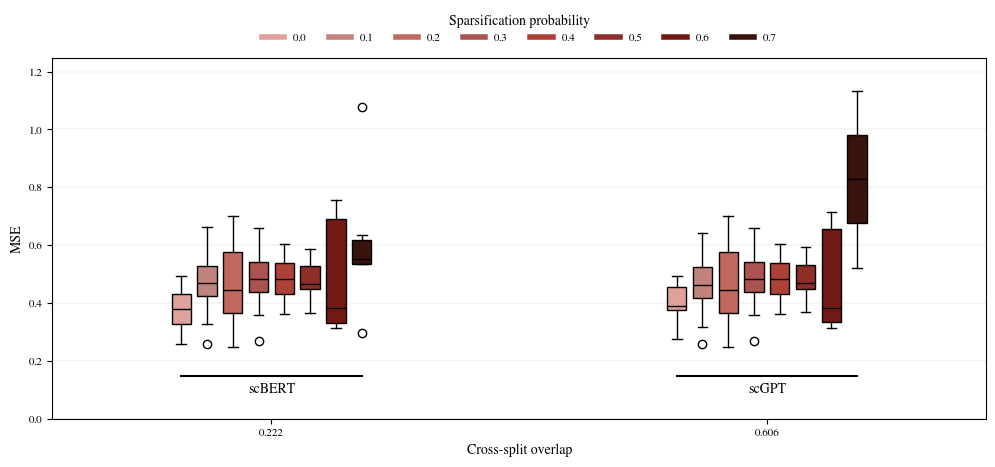

In [20]:
#cmap = load_cmap('Tam')
colors = ['#E0A19D', '#C2837D', '#C2695F', '#AB544F', '#AD4137', '#8F2E27', '#711912', '#38120D']

# Positions for scbert and scgpt boxplots
positions_scbert = [cso_dict['scbert'] + i * 0.02 for i in range(len(sorted_split_data_scbert))]
positions_scgpt = [cso_dict['scgpt'] + i * 0.02 for i in range(len(sorted_split_data_scgpt))]

# Initialize fig
plt.figure(figsize=(10, 5))

# Plot boxplots for scbert
boxplots_scbert = plt.boxplot(sorted_split_data_scbert.values(), positions=positions_scbert, patch_artist=True, widths=0.015)
for patch, color in zip(boxplots_scbert['boxes'], colors):
    patch.set_facecolor(color)
for median in boxplots_scbert['medians']:
    median.set_color('black')

# Plot boxplots for scgpt
boxplots_scgpt = plt.boxplot(sorted_split_data_scgpt.values(), positions=positions_scgpt, patch_artist=True, widths=0.015)
for patch, color in zip(boxplots_scgpt['boxes'], colors):
    patch.set_facecolor(color)
for median in boxplots_scgpt['medians']:
    median.set_color('black')

# Add brackets below the boxplots and space the text
bracket_y = min(min(v) for v in sorted_split_data_scbert.values()) - 0.1
text_offset = 0.08  # Space between the line and the text
x_axis_offset = 0.02  # Space between the text and x-axis

plt.plot([min(positions_scbert), max(positions_scbert)], [bracket_y] * 2, color='black', lw=1.5)
plt.text(np.mean(positions_scbert), bracket_y - text_offset + x_axis_offset, "scBERT", ha="center", fontsize=10)

plt.plot([min(positions_scgpt), max(positions_scgpt)], [bracket_y] * 2, color='black', lw=1.5)
plt.text(np.mean(positions_scgpt), bracket_y - text_offset + x_axis_offset, "scGPT", ha="center", fontsize=10)

# Center the x-ticks below the brackets
mean_position_scbert = np.mean(positions_scbert)
mean_position_scgpt = np.mean(positions_scgpt)
plt.xticks([mean_position_scbert, mean_position_scgpt], ['{:.3f}'.format(cso_dict['scbert']), 
                                                         '{:.3f}'.format(cso_dict['scgpt'])])

plt.ylim(0, max(positions_scgpt) + 0.5)
plt.xlim(min(positions_scbert) - 0.1, max(positions_scgpt) + 0.1)

# Set the axis labels
plt.xlabel("Cross-split overlap")
plt.ylabel("MSE")

# Create legend
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in colors],
           labels=list(sorted_split_data_scbert.keys()), 
           title="Sparsification probability", loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(sorted_split_data_scbert), frameon=False)

plt.grid(axis='y', color = 'gray', linewidth = 0.1)#, alpha = 0.5)

# Adjust layout
#plt.title("Effct of Cross-Split Overlap on Model Performance at Different Splits")
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adding padding to the bottom

# Save plot
file_path = 'cross_split_overlap_full.pdf'
plt.savefig(file_path, dpi=600)

plt.show()